In [17]:
import pandas as pd
import numpy as np
import matplotlib.style
import matplotlib.pyplot as plt
import yfinance as yf
pd.options.display.float_format = '{:.4f}'.format
plt.style.use("seaborn-v0_8")
from itertools import product

In [18]:
symbol = "EURUSD=X"
start = "2005-01-01"
end = "2024-01-01"
window = 3

In [19]:
df = yf.download(symbol, start, end, interval='1d').Close.to_frame()
df.rename(columns={"Close": "price"}, inplace=True)
df

[*********************100%%**********************]  1 of 1 completed


,price
Date,
2005-01-03,1.3470
2005-01-04,1.3282
2005-01-05,1.3280
2005-01-06,1.3183
2005-01-07,1.3061
...,...
2023-12-25,1.1027
2023-12-26,1.1020
2023-12-27,1.1043


In [20]:
spread = 1.5 * 0.0001
halfspread = spread / 2
ptc = halfspread / df.price.mean()
ptc

np.float64(6.06616684551594e-05)

In [21]:
df['returns'] = np.log(df['price'].div(df['price'].shift(1)))
df['returns_rolling'] = df['returns'].rolling(window=window).mean()
df['position'] = np.sign(df['returns_rolling'].rolling(window=window).mean())
df['strategy'] = df.position.shift(1) * df.returns
df['creturns'] = df['returns'].cumsum().apply(np.exp)
df['cstrategy'] = df['strategy'].cumsum().apply(np.exp)
df['trades'] = df.position.diff().fillna(0).abs()
df['strategy_net'] = df.strategy - df.trades*ptc
df['cstrategy_net'] = df.strategy_net.cumsum().apply(np.exp)

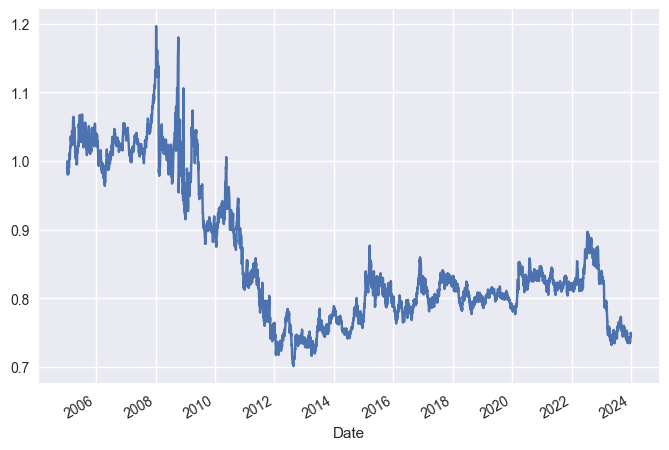

In [22]:
df.cstrategy_net.plot()
plt.show()